### Libraries

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

### Preparing the dataset

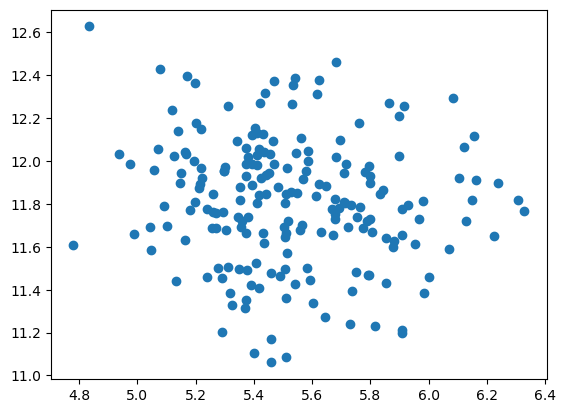

In [2]:
# Set a seed for reproducibility
random.seed(4)

# Generate a synthetic dataset with make_blobs
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, 
         center_box=(20, 5))
 
# Visualize the dataset using a scatter plot
plt.scatter(x[:, 0], x[:, 1])
plt.show()

### Gaussian Mixture Model (GMM)

Gaussian Mixture Model Definition 

* A Gaussian Mixture Model (GMM) is a statistical method that uses the weighted sum of probability density functions from multiple Gaussian distributions to deal with non-Gaussian data.

* A Gaussian mixture model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters

* The essence of GMM lies in its ability to determine cluster characteristics such as mean, variance, and weight.

* The <b> mean of each Gaussian </b> component gives us a central point, around which the data points are most densely clustered.

* The <b> variance, on the other hand </b> , provides insight into the spread or dispersion of the data points around this mean. A smaller variance indicates that the data points are closely clustered around the mean, while a larger variance suggests a more spread-out cluster.

* The <b> weights in a GMM are particularly significant </b>. They represent the proportion of the dataset that belongs to each Gaussian component. In a sense, these weights embody the strength or dominance of each cluster within the overall mixture. Higher weights imply that a greater portion of the data aligns with that particular Gaussian distribution, signifying its greater prominence in the model.



##### Use Cases of Gaussian Mixture Models
GMMs find application in a diverse range of fields:

* Anomaly Detection: Identifying unusual data patterns.
* Image Segmentation: Grouping pixels in images based on color or texture.
* Speech Recognition: Assisting in the recognition of phonemes in audio data.
* Handwriting Recognition: Simulating different handwriting styles.
* Customer Segmentation: Grouping customers with similar behaviors or preferences.
* Data Clustering: Finding natural groups in data.
* Computer Vision: Object detection and background removal.
* Bioinformatics: Analyzing gene expression data.
* Recommendation Systems: Personalizing user experiences.
* Medical Imaging: Tissue classification and abnormality detection.
* Finance: Asset price modeling and risk management.


### Defining the model and anomaly detection


*    In scikit-learn's GaussianMixture class, the score_samples method computes the log likelihood of each sample in the input data. The <u> log likelihood represents how well the observed data fits the estimated Gaussian mixture model </u>. 



*    In the context of anomaly detection, we can set a threshold on these log likelihood scores. Samples with <u>log likelihoods below a certain threshold are considered anomalies or outliers</u>, as they are less likely to be generated by the learned Gaussian mixture model. 

*    We'll define the model by using the GaussianMixture class of Scikit-learn. Here, we'll use the class with a default value. You can set some of the arguments according to your dataset content. You can check all default parameters used in a class with get_params() method.

In [3]:
# Fit a Gaussian Mixture Model to the dataset
gausMix = GaussianMixture().fit(x)

# Access and print entire attribute dictionary
display(gausMix.get_params())

C:\Users\shaikh.kamran\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 1,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [4]:
# Compute the weighted log probabilities for each sample
scores = gausMix.score_samples(x)


# Extract the threshold for anomaly detection using quantile
thresh = quantile(scores, .03)
print(thresh)

-2.4998195352804236


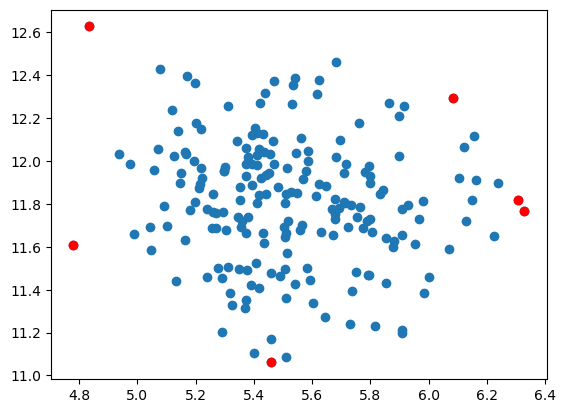

In [5]:
# Identify samples with scores equal to or lower than the threshold
index = where(scores <= thresh)

# Identify samples with scores equal to or lower than the threshold
index = where(scores <= thresh)
values = x[index]

# Visualize the dataset with anomalies highlighted in red
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='r')
plt.show()

### Real-world examples where Gaussian mixture models can be used : iris dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

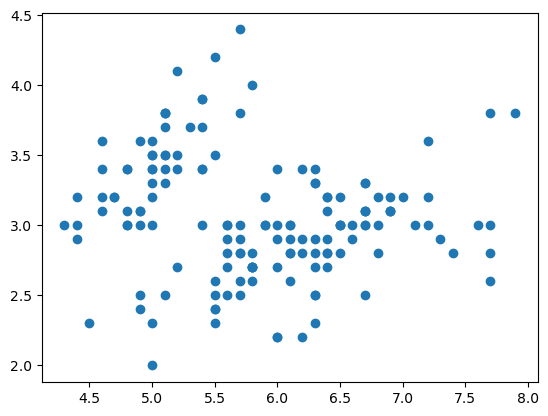

In [11]:
iris =datasets.load_iris()
X = iris.data[ :, :2]  #extract only the first two features 

d = pd.DataFrame(X)

plt.scatter(d[0], d[1])
plt.show()

C:\Users\shaikh.kamran\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


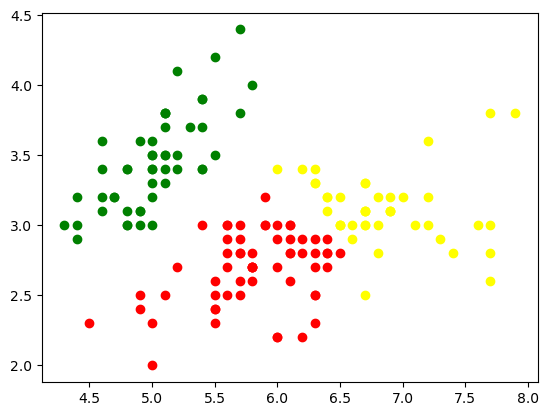

In [20]:
gmm = GaussianMixture(n_components=3)
gmm.fit(d)

labels = gmm.predict(d)

d['labels'] = labels

d0 = d[d['labels'] == 0]
d1 = d[d['labels'] == 1]
d2 = d[d['labels'] == 2]

plt.scatter(d0['0'], d0['1'], c='r')
plt.scatter(d1['0'], d1['1'], c='yellow')
plt.scatter(d2['0'], d2['1'], c='g')

plt.show()
